<a href="https://colab.research.google.com/github/ayuarista/CNN_fashionMNIST/blob/main/final_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convulotional Neural Network pada Dataset Fashion MNIST
Sebelum kita melakukan klasifikasi kita harus mengimport library-library yang akan kita gunakan seperti, tensorflow, pandas, keras, dl

In [ ]:
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Using TensorFlow backend.


## Import Library yang diperlukan didalam CNN

In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
 

## Import dataset Fashion MNIST menggunakan TensorFlow built-in feature
selanjutnya kita download datasets yang kita gunakan yakni Fashion-mnist

In [ ]:
# Import libraries
from tensorflow.examples.tutorials.mnist import input_data

# Import Fashion MNIST
fashion_mnist = input_data.read_data_sets("data/fashion")

W0820 06:10:48.605494 140555004159872 deprecation.py:323] From <ipython-input-3-ed689a2c3578>:4: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0820 06:10:48.606892 140555004159872 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0820 06:10:48.607965 140555004159872 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting data/fashion/train-images-idx3-ubyte.gz


W0820 06:10:49.003010 140555004159872 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0820 06:10:49.071260 140555004159872 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


sekarang kita gunakan tensorflow untuk membaca dataset yang kita miliki

In [ ]:
!mkdir data/fashion
!wget -O data/fashion/train-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -O data/fashion/train-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -O data/fashion/t10k-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -O data/fashion/t10k-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

mkdir: cannot create directory ‘data/fashion’: File exists
--2019-08-20 06:10:52--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.74.23
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.74.23|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘data/fashion/train-images-idx3-ubyte.gz’

data/fashion/train- 100%[===================>]  25.20M  16.8MB/s    in 1.5s    

2019-08-20 06:10:54 (16.8 MB/s) - ‘data/fashion/train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2019-08-20 06:10:55--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazo

In [ ]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=fashion_mnist.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=fashion_mnist.train.labels.shape))

# Shapes of validation set
print("Validation set (images) shape: {shape}".format(shape=fashion_mnist.validation.images.shape))
print("Validation set (labels) shape: {shape}".format(shape=fashion_mnist.validation.labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=fashion_mnist.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=fashion_mnist.test.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000,)
Validation set (images) shape: (5000, 784)
Validation set (labels) shape: (5000,)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000,)


# Data Preparation

## Dataset Fashion MNIST

Data yang di import dapat dibagi seperti berikut:

    Training (fashion_mnist.train.train) >> data yang digunakan untuk melatih model untuk mencari pola masing-masing data berdasarkan class-nya

      - 55,000 sampel data dengan 784 pixel
      - mnist.train.images untuk inputs
      - mnist.train.labels untuk outputs

    Validation (fashion_mnist.validation) >> umumnya digunakan untuk mencegah model menjadi overfitting, opsional untuk dipakai.

      - 5,000 sampel data dengan 784 pixel
      - mnist.validation.images untuk inputs
      - mnist.validation.labels untuk outputs

    Test (fashion_mnist.test) >> digunakan untuk mengevaluasi performa dan akurasi dari model, mencerminkan situasi nyata
    
      - 10,000 sampel data dengan 784 pixel
      - mnist.test.images untuk inputs
      - mnist.test.labels untuk outputs



In [ ]:
unique1, counts1 = np.unique(fashion_mnist.train.labels, return_counts=True)
unique2, counts2 = np.unique(fashion_mnist.validation.labels, return_counts=True)
unique3, counts3 = np.unique(fashion_mnist.test.labels, return_counts=True)

print (dict(zip(unique1, counts1)))
print (dict(zip(unique2, counts2)))
print (dict(zip(unique3, counts3)))

{0: 5543, 1: 5444, 2: 5496, 3: 5499, 4: 5512, 5: 5507, 6: 5507, 7: 5488, 8: 5510, 9: 5494}
{0: 457, 1: 556, 2: 504, 3: 501, 4: 488, 5: 493, 6: 493, 7: 512, 8: 490, 9: 506}
{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


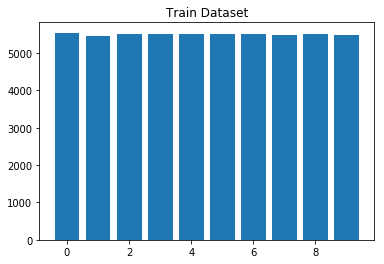

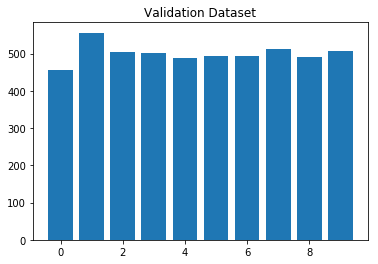

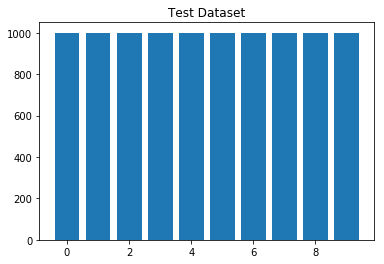

In [ ]:
#plot pembagian data set sesuai brand

plt.bar(unique1, counts1)
plt.title('Train Dataset') 
plt.show()

plt.bar(unique2, counts2)
plt.title('Validation Dataset') 
plt.show()

plt.bar(unique3, counts3)
plt.title('Test Dataset') 
plt.show()

Dengan identifkasi tiap label adalah sebagai berikut:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Configuration

## Menentukan Parameter 

> Buat parameter general pada model


In [ ]:
# data yang dipisah menjadi train dataset, validation dataset, test dataset
(x_train, y_train), (x_test, y_test),(x_val, y_val) = (fashion_mnist.train.images, fashion_mnist.train.labels) , (fashion_mnist.test.images, fashion_mnist.test.labels), (fashion_mnist.validation.images, fashion_mnist.validation.labels)

#parameter

img_rows = 28
img_cols = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018

#Model
no_epochs = 20
batch_size = 128


## Visualisasi Dataset Fashion MNIST


In [ ]:
fm_xtrain = pd.DataFrame(x_train)  
print (fm_xtrain.head())
print (fm_xtrain.describe())
print ("NaN pada x_train dataset = ",fm_xtrain.isnull().any().sum())

   0    1    2    3    4    5    ...       778       779       780  781  782  783
0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.498039  0.490196  0.298039  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.000000  0.000000  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.000000  0.000000  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.000000  0.000000  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.000000  0.000000  0.0  0.0  0.0

[5 rows x 784 columns]
                0             1    ...           782           783
count  55000.000000  55000.000000  ...  55000.000000  55000.000000
mean       0.000003      0.000021  ...      0.003186      0.000276
std        0.000361      0.000911  ...      0.035769      0.008114
min        0.000000      0.000000  ...      0.000000      0.000000
25%        0.000000      0.000000  ...      0.000000      0.000000
50%        0.000000      0.000000  ...      0.000000      0.000000
75%        0.00

In [ ]:
fm_yt = pd.DataFrame(y_train)
print (fm_yt.head(10))
print ("NaN pada y_train dataset = ", fm_yt.isnull().any().sum())

   0
0  4
1  0
2  7
3  9
4  9
5  9
6  4
7  4
8  3
9  4
NaN pada y_train dataset =  0


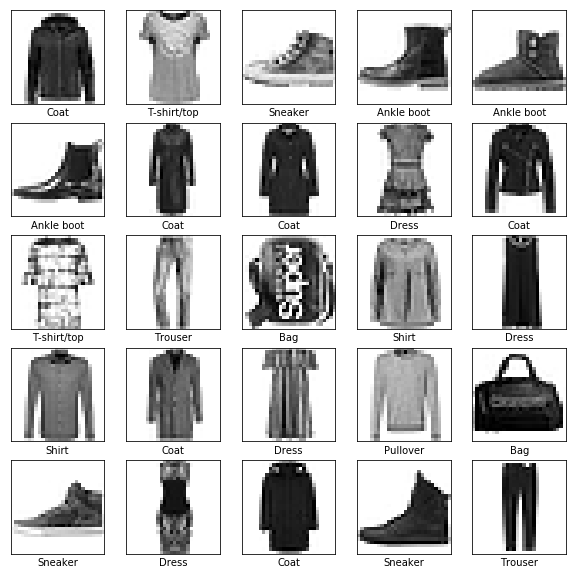

In [ ]:
# scale the values to a range of 0 to 1 of both data sets
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fashion_mnist.train.images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[fashion_mnist.train.labels[i]])
plt.show()


# Design Input

<img src = "https://imgur.com/BgVJiTp.jpg" align = "center"></a>

# Convulotional Neural Network


## CNN 3 layer dengan 20 epoch

In [ ]:
# Model
model = Sequential()
# Add convolution 2D with 3 layers
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0820 06:11:09.737230 140555004159872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 06:11:09.742461 140555004159872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 06:11:09.747243 140555004159872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0820 06:11:09.767790 140555004159872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0820 06:11:09.771128 140555004159872 deprec

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               147584    
__________

### Training

In [ ]:
xtt_train=x_train.reshape(-1,28,28,1)
xtt_val=x_val.reshape(-1,28,28,1)
train_model = model.fit(xtt_train, y_train,
                  batch_size=batch_size,
                  epochs=no_epochs,
                  verbose=1,
                  validation_data=(xtt_val, y_val))

W0820 06:11:09.972925 140555004159872 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 48s 865us/step - loss: 0.9758 - acc: 0.6373 - val_loss: 0.7230 - val_acc: 0.7312
Epoch 2/20
55000/55000 [==============================] - 47s 860us/step - loss: 0.6684 - acc: 0.7459 - val_loss: 0.5846 - val_acc: 0.7798
Epoch 3/20
55000/55000 [==============================] - 47s 854us/step - loss: 0.5641 - acc: 0.7872 - val_loss: 0.5006 - val_acc: 0.8196
Epoch 4/20
55000/55000 [==============================] - 47s 856us/step - loss: 0.5023 - acc: 0.8125 - val_loss: 0.4493 - val_acc: 0.8440
Epoch 5/20
55000/55000 [==============================] - 47s 859us/step - loss: 0.4593 - acc: 0.8289 - val_loss: 0.4353 - val_acc: 0.8426
Epoch 6/20
55000/55000 [==============================] - 47s 851us/step - loss: 0.4291 - acc: 0.8413 - val_loss: 0.4238 - val_acc: 0.8466
Epoch 7/20
55000/55000 [==============================] - 47s 855us/step - loss: 0.4016 - acc: 0.8534 - val_loss: 0.3

### Test Akurasi

In [ ]:
test_loss, test_acc = model.evaluate(x_test.reshape(10000,28,28,1), y_test)
print("Test loss:", test_loss * 100)
print('Test accuracy:', test_acc*100)

val_loss, val_acc = model.evaluate(x_val.reshape(5000,28,28,1), y_val)

print("val loss:", val_loss * 100)
print('val acc :', val_acc * 100)

10000/10000 [==============================] - 3s 300us/step
Test loss: 31.94230758547783
Test accuracy: 88.88000000000001
5000/5000 [==============================] - 2s 301us/step
val loss: 29.23955323755741
val acc : 89.53999999999999


### Plot Loss dan Akurasi

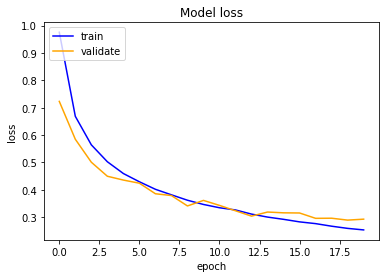

In [ ]:
#Plot loss results for training data and testing data
plt.plot(train_model.history['loss'], 'blue')
plt.plot(train_model.history['val_loss'], 'orange')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

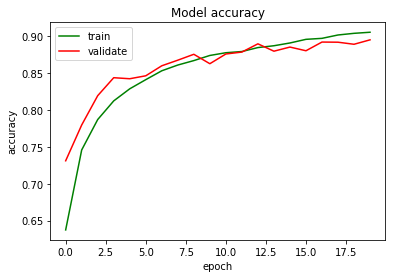

In [ ]:
#Plot accuracy results for training data and testing data 
plt.plot(train_model.history['acc'], 'green')
plt.plot(train_model.history['val_acc'],'red')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

### Prediksi

In [ ]:
# confidence of the model that the image corresponds to the label 
predictions = model.predict(x_test.reshape(10000,28,28,1))
predictions.shape #(10000, 10)
predictions[0]

array([9.0803026e-10, 2.2338109e-09, 8.3503099e-10, 2.5846958e-09,
       1.6447197e-09, 1.1817970e-03, 1.7840660e-10, 9.6844614e-04,
       1.9933032e-06, 9.9784768e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
class_names[9]

'Ankle boot'

In [ ]:
y_test[0]

9

In [ ]:
# plot image in a grid
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
# plot the value array    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

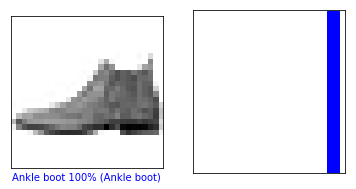

In [ ]:
# look at 0th image, predictions, prediction array
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)

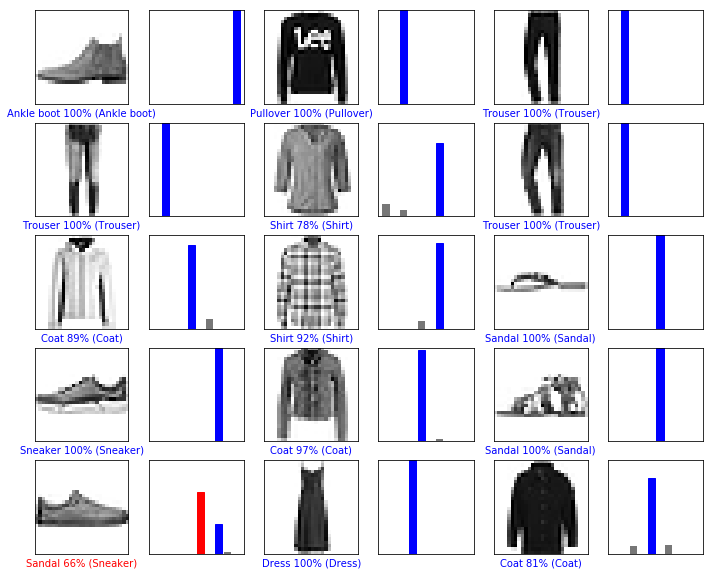

In [ ]:
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of the first 15 images, CNN 3 dengan 10 epoch")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test.reshape(10000,28,28))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)

## Experiment

### CNN 3 layer dengan 5 epoch

In [ ]:
# Model
model_3e5 = Sequential()
# Add convolution 2D with 3 layers
model_3e5.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(img_rows, img_cols, 1)))
model_3e5.add(MaxPooling2D((2, 2)))
model_3e5.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model_3e5.add(MaxPooling2D(pool_size=(2, 2)))
model_3e5.add(Conv2D(128, (3, 3), activation='relu'))
model_3e5.add(Flatten())
model_3e5.add(Dense(128, activation='relu'))
model_3e5.add(Dense(NUM_CLASSES, activation='softmax'))


model_3e5.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_3e5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               147584    
__________

In [ ]:
xtt_train=x_train.reshape(-1,28,28,1)
xtt_val=x_val.reshape(-1,28,28,1)
train_model_3e5 = model_3e5.fit(xtt_train, y_train,
                  batch_size=batch_size,
                  epochs=5,
                  verbose=1,
                  validation_data=(xtt_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 48s 866us/step - loss: 0.9694 - acc: 0.6418 - val_loss: 0.6909 - val_acc: 0.7486
Epoch 2/5
55000/55000 [==============================] - 47s 861us/step - loss: 0.6525 - acc: 0.7526 - val_loss: 0.5726 - val_acc: 0.7920
Epoch 3/5
55000/55000 [==============================] - 48s 864us/step - loss: 0.5586 - acc: 0.7880 - val_loss: 0.4917 - val_acc: 0.8216
Epoch 4/5
55000/55000 [==============================] - 47s 860us/step - loss: 0.4966 - acc: 0.8136 - val_loss: 0.4623 - val_acc: 0.8300
Epoch 5/5
55000/55000 [==============================] - 47s 859us/step - loss: 0.4567 - acc: 0.8309 - val_loss: 0.4200 - val_acc: 0.8510


In [ ]:
test_loss, test_acc = model_3e5.evaluate(x_test.reshape(10000,28,28,1), y_test)
print("Test loss:", test_loss * 100)
print('Test accuracy:', test_acc*100)

10000/10000 [==============================] - 3s 298us/step
Test loss: 45.3731538438797
Test accuracy: 83.19


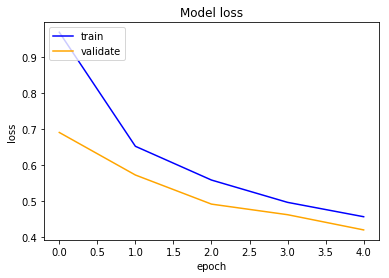

In [ ]:
#Plot loss results for training data and testing data
plt.plot(train_model_3e5.history['loss'], 'blue')
plt.plot(train_model_3e5.history['val_loss'], 'orange')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

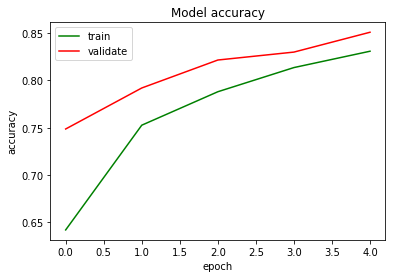

In [ ]:
#Plot accuracy results for training data and testing data 
plt.plot(train_model_3e5.history['acc'], 'green')
plt.plot(train_model_3e5.history['val_acc'],'red')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

In [ ]:
# confidence of the model that the image corresponds to the label 
predictions_3e5 = model_3e5.predict(x_test.reshape(10000,28,28,1))
predictions_3e5.shape #(10000, 10)
predictions_3e5[0]

array([8.3472464e-08, 5.9591363e-09, 1.3572928e-06, 1.9807833e-06,
       3.3942192e-07, 1.0891738e-02, 8.4734260e-08, 1.7180470e-01,
       2.7400741e-04, 8.1702578e-01], dtype=float32)

In [ ]:
np.argmax(predictions_3e5[14])

4

In [ ]:
class_names[4]

'Coat'

In [ ]:
y_test[14]

4

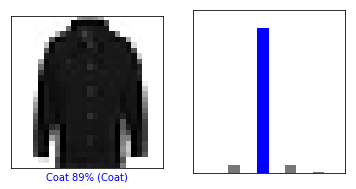

In [ ]:
# look at 14th image, predictions, prediction array
i=14
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_3e5, y_test, x_test.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions_3e5, y_test)

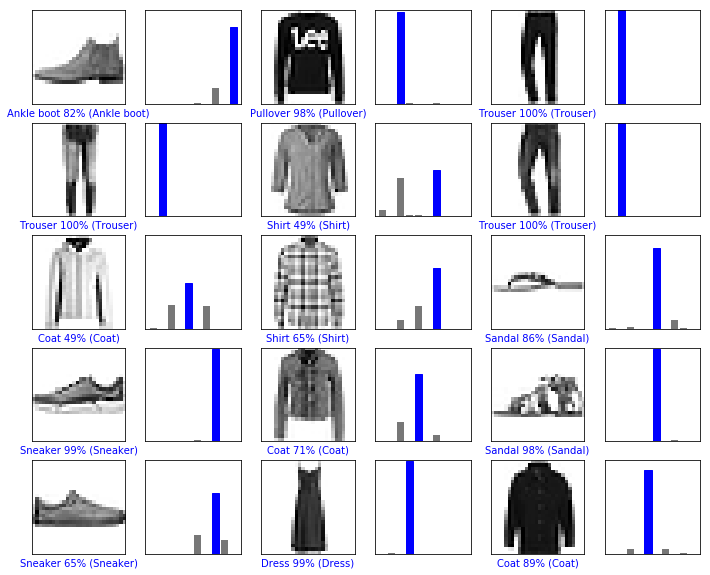

In [ ]:
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of the first 15 images, with CNN 5 epoch")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_3e5, y_test, x_test.reshape(10000,28,28))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_3e5, y_test)

### CNN 3 layer dengan 10 epoch

In [ ]:
# Model
model_3e10 = Sequential()
# Add convolution 2D with 3 layers
model_3e10.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(img_rows, img_cols, 1)))
model_3e10.add(MaxPooling2D((2, 2)))
model_3e10.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model_3e10.add(MaxPooling2D(pool_size=(2, 2)))
model_3e10.add(Conv2D(128, (3, 3), activation='relu'))
model_3e10.add(Flatten())
model_3e10.add(Dense(128, activation='relu'))
model_3e10.add(Dense(NUM_CLASSES, activation='softmax'))


model_3e10.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_3e10.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               147584    
__________

In [ ]:
xtt_train=x_train.reshape(-1,28,28,1)
xtt_val=x_val.reshape(-1,28,28,1)
train_model_3e10 = model_3e10.fit(xtt_train, y_train,
                  batch_size=batch_size,
                  epochs=10,
                  verbose=1,
                  validation_data=(xtt_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 48s 876us/step - loss: 0.9586 - acc: 0.6422 - val_loss: 0.6951 - val_acc: 0.7382
Epoch 2/10
55000/55000 [==============================] - 47s 861us/step - loss: 0.6453 - acc: 0.7553 - val_loss: 0.5666 - val_acc: 0.7904
Epoch 3/10
55000/55000 [==============================] - 47s 862us/step - loss: 0.5486 - acc: 0.7948 - val_loss: 0.4993 - val_acc: 0.8118
Epoch 4/10
55000/55000 [==============================] - 48s 868us/step - loss: 0.4938 - acc: 0.8156 - val_loss: 0.4468 - val_acc: 0.8384
Epoch 5/10
55000/55000 [==============================] - 48s 869us/step - loss: 0.4528 - acc: 0.8318 - val_loss: 0.4307 - val_acc: 0.8472
Epoch 6/10
55000/55000 [==============================] - 48s 866us/step - loss: 0.4243 - acc: 0.8439 - val_loss: 0.4002 - val_acc: 0.8588
Epoch 7/10
55000/55000 [==============================] - 48s 869us/step - loss: 0.3998 - acc: 0.8507 - val_loss: 0.3

In [ ]:
test_loss, test_acc = model_3e10.evaluate(x_test.reshape(10000,28,28,1), y_test)
print("Test loss:", test_loss * 100)
print('Test accuracy:', test_acc*100)



10000/10000 [==============================] - 3s 311us/step
Test loss: 36.47226549863815
Test accuracy: 86.9


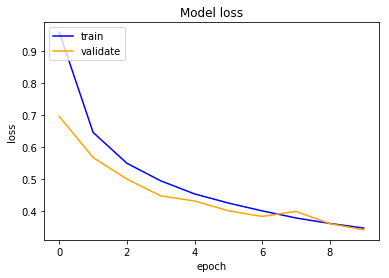

In [ ]:
#Plot loss results for training data and testing data
plt.plot(train_model_3e10.history['loss'], 'blue')
plt.plot(train_model_3e10.history['val_loss'], 'orange')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

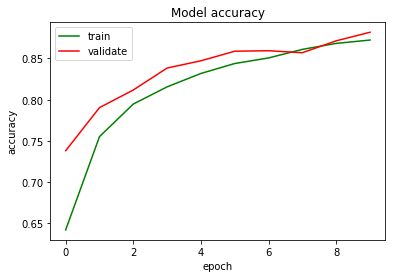

In [ ]:
#Plot accuracy results for training data and testing data 
plt.plot(train_model_3e10.history['acc'], 'green')
plt.plot(train_model_3e10.history['val_acc'],'red')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

In [ ]:
# confidence of the model that the image corresponds to the label 
predictions_3e10 = model_3e10.predict(x_test.reshape(10000,28,28,1))
predictions_3e10.shape #(10000, 10)
predictions_3e10[0]

array([2.0179782e-07, 1.1285576e-09, 1.4437403e-07, 2.2500195e-09,
       2.8834231e-07, 8.8013997e-03, 1.5291781e-07, 3.6576029e-02,
       3.2958316e-05, 9.5458877e-01], dtype=float32)

In [ ]:
np.argmax(predictions_3e10[5])

1

In [ ]:
class_names[1]

'Trouser'

In [ ]:
y_test[5]

1

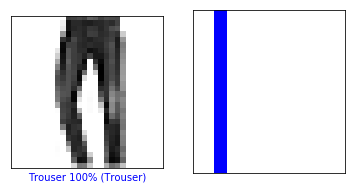

In [ ]:
# look at 0th image, predictions, prediction array
i=5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_3e10, y_test, x_test.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions_3e10, y_test)

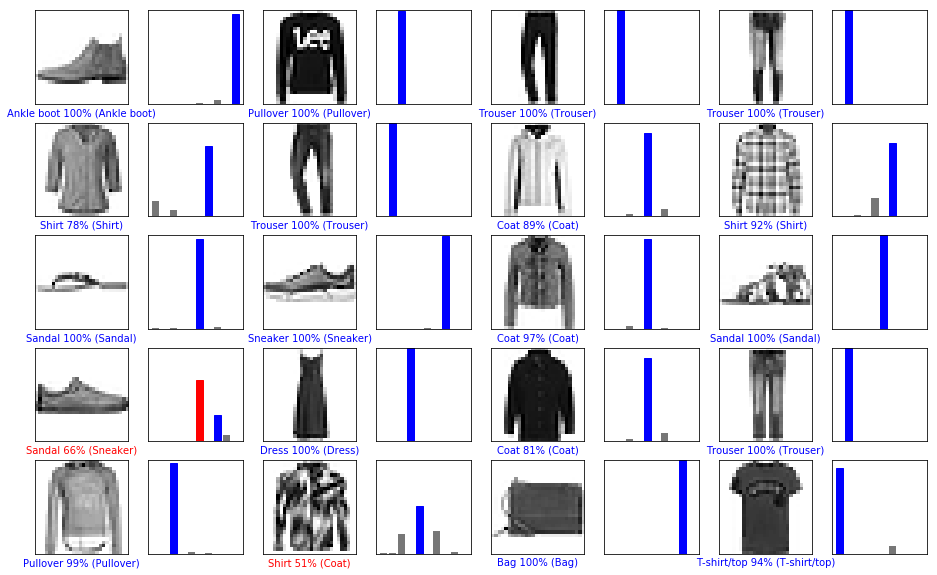

In [ ]:
# Plot the first 20 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of the first 20 images, with CNN 3 dengan 20 epoch")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test.reshape(10000,28,28))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_3e10, y_test)

### CNN 2 layer dengan 20 epoch

In [ ]:
# Model
model_2e20 = Sequential()
# Add convolution 2D with 3 layers
model_2e20.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(img_rows, img_cols, 1)))
model_2e20.add(MaxPooling2D((2, 2)))
model_2e20.add(Conv2D(64, (3, 3), activation='relu'))
model_2e20.add(Flatten())
model_2e20.add(Dense(64, activation='relu'))
model_2e20.add(Dense(NUM_CLASSES, activation='softmax'))


model_2e20.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_2e20.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_4 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                495680    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 515,146
Trainable params: 515,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
xtt_train=x_train.reshape(-1,28,28,1)
xtt_val=x_val.reshape(-1,28,28,1)
train_model_2e20 = model_2e20.fit(xtt_train, y_train,
                  batch_size=batch_size,
                  epochs=no_epochs,
                  verbose=1,
                  validation_data=(xtt_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 46s 832us/step - loss: 0.8659 - acc: 0.6876 - val_loss: 0.5959 - val_acc: 0.7786
Epoch 2/20
55000/55000 [==============================] - 44s 809us/step - loss: 0.5759 - acc: 0.7819 - val_loss: 0.5315 - val_acc: 0.8030
Epoch 3/20
55000/55000 [==============================] - 44s 807us/step - loss: 0.5090 - acc: 0.8126 - val_loss: 0.4608 - val_acc: 0.8386
Epoch 4/20
55000/55000 [==============================] - 44s 807us/step - loss: 0.4632 - acc: 0.8317 - val_loss: 0.4563 - val_acc: 0.8382
Epoch 5/20
55000/55000 [==============================] - 44s 805us/step - loss: 0.4263 - acc: 0.8471 - val_loss: 0.4222 - val_acc: 0.8488
Epoch 6/20
55000/55000 [==============================] - 45s 811us/step - loss: 0.3994 - acc: 0.8579 - val_loss: 0.3770 - val_acc: 0.8684
Epoch 7/20
55000/55000 [==============================] - 44s 806us/step - loss: 0.3771 - acc: 0.8646 - val_loss: 0.3

In [ ]:
test_loss, test_acc = model_2e20.evaluate(x_test.reshape(10000,28,28,1), y_test)
print("Test loss:", test_loss * 100)
print('Test accuracy:', test_acc*100)

10000/10000 [==============================] - 3s 289us/step
Test loss: 29.87008534789085
Test accuracy: 89.5


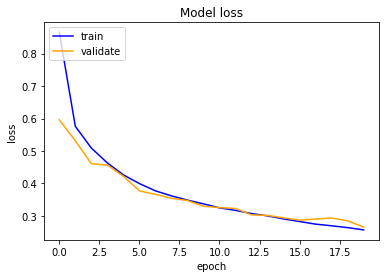

In [ ]:
#Plot loss results for training data and testing data
plt.plot(train_model_2e20.history['loss'], 'blue')
plt.plot(train_model_2e20.history['val_loss'], 'orange')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

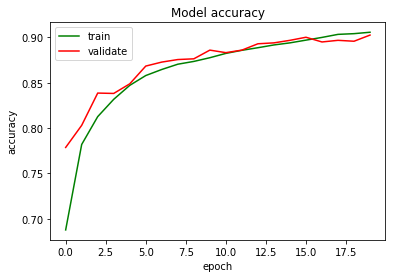

In [ ]:
#Plot accuracy results for training data and testing data 
plt.plot(train_model_2e20.history['acc'], 'green')
plt.plot(train_model_2e20.history['val_acc'],'red')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

In [ ]:
# confidence of the model that the image corresponds to the label 
predictions_2e20 = model_2e20.predict(x_test.reshape(10000,28,28,1))
predictions_2e20.shape #(10000, 10)
predictions_2e20[0]

array([8.8918711e-08, 2.3612048e-11, 1.0930035e-07, 4.4953707e-09,
       4.1572208e-09, 4.2708772e-03, 4.7056322e-08, 1.9045487e-02,
       1.8651571e-04, 9.7649688e-01], dtype=float32)

In [ ]:
np.argmax(predictions_3e10[66])

0

In [ ]:
class_names[6]

'Shirt'

In [ ]:
y_test[66]

2

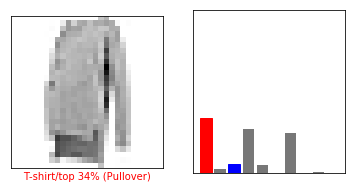

In [ ]:
# look at 0th image, predictions, prediction array
i=66
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_3e10, y_test, x_test.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions_3e10, y_test)

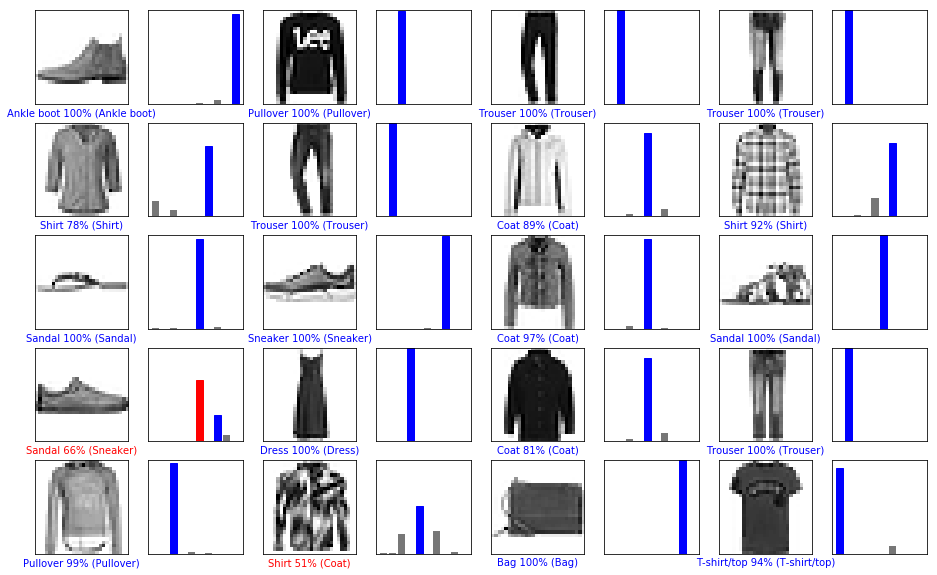

In [ ]:
# Plot the first 20 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of the first 20 images, with CNN 2 dengan 10 epoch")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test.reshape(10000,28,28))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_3e10, y_test)